In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
iris = load_iris()
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualizations

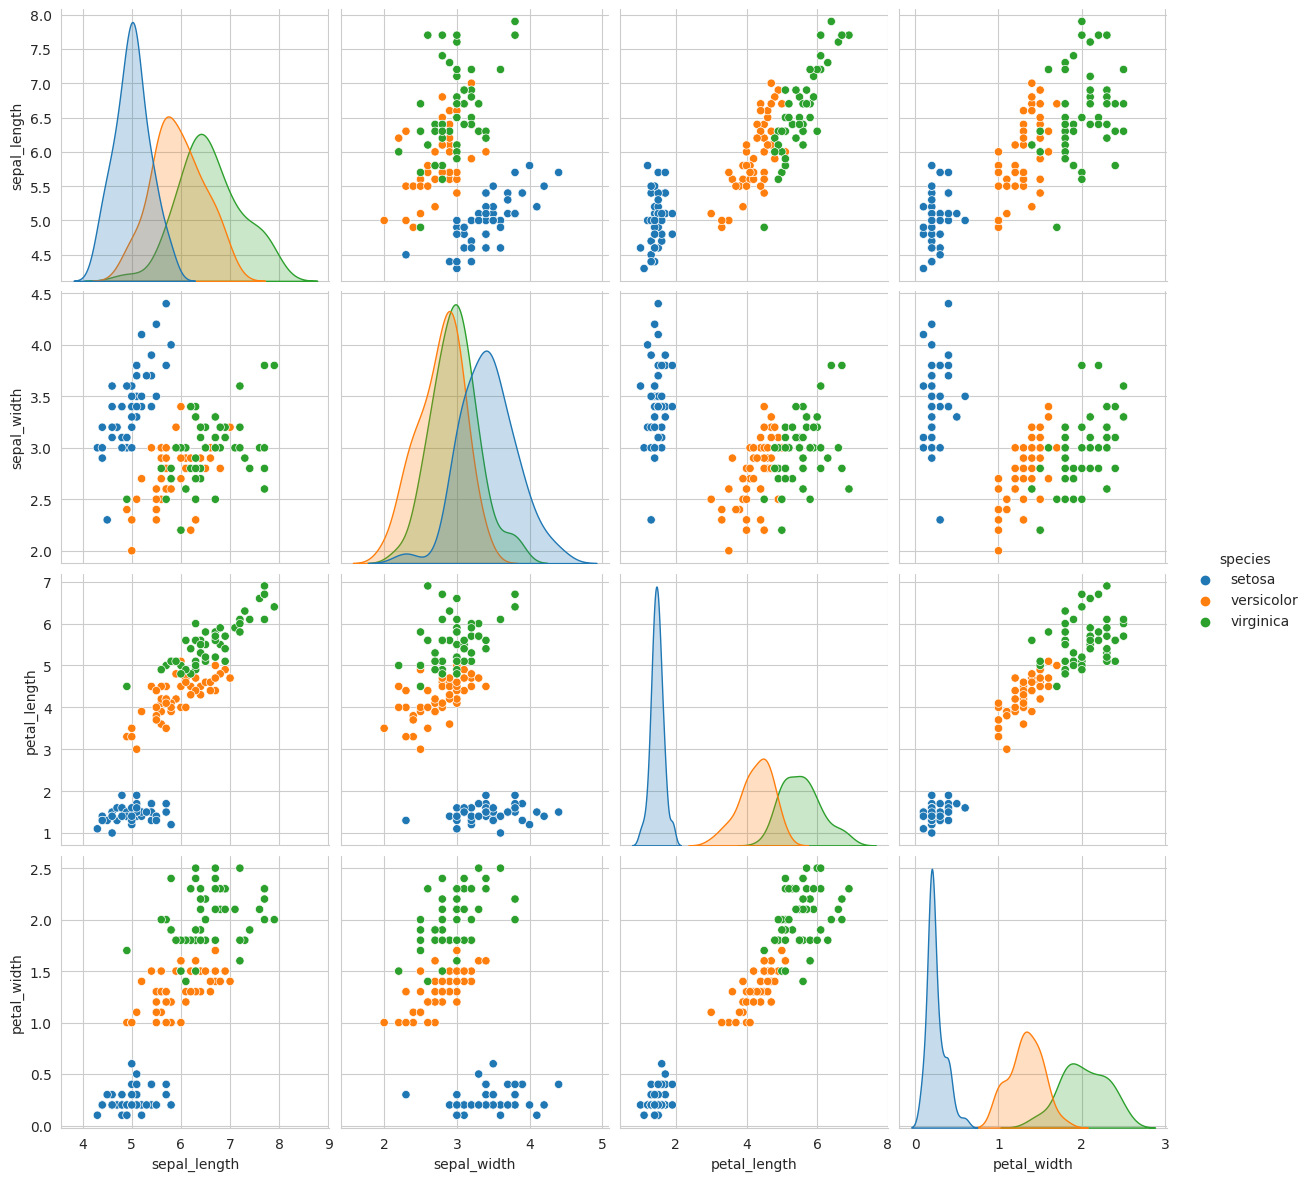

In [4]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

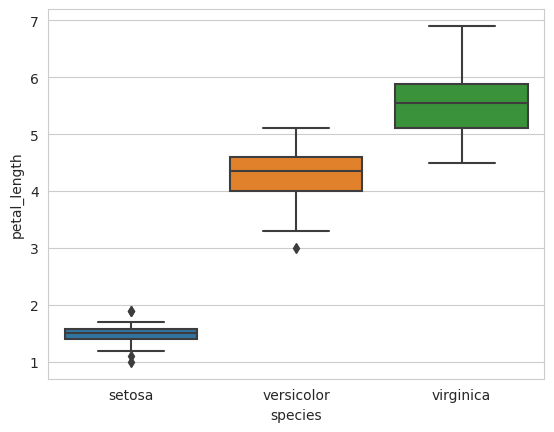

In [5]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

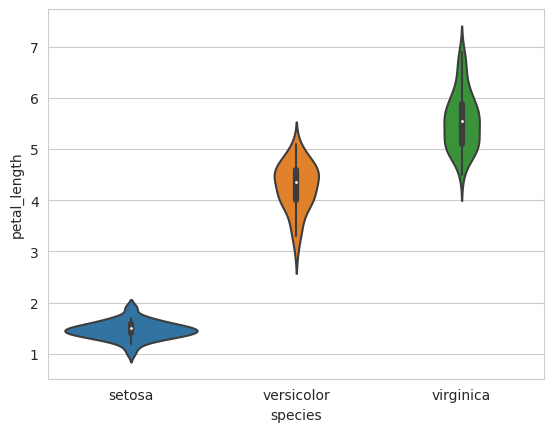

In [6]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

## Correlación

<Axes: >

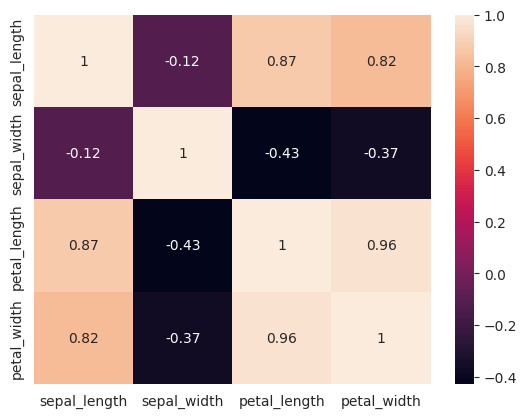

In [7]:
corr=iris.corr()
sns.heatmap(corr,annot=True)

## Valores nulos

In [8]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Codificando las especies

In [9]:
encoder = LabelEncoder()
iris['species'] = encoder.fit_transform(iris['species'])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
# 0 --> setosa 
# 1 --> versicolor
# 2 --> virginica
np.unique(iris['species'])

array([0, 1, 2])

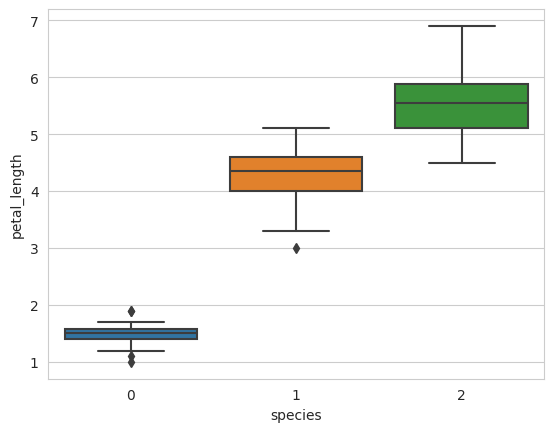

In [11]:
# Comprobacion de los IDs y la codificación
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

## Train and test dataset

In [12]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, 4]

In [13]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 4)

print('Train and test sizes {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes (120, 4) (30, 4)
Train and test sizes (120,) (30,)


# Modeling

## Determine the optimal number of clusters

In [14]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

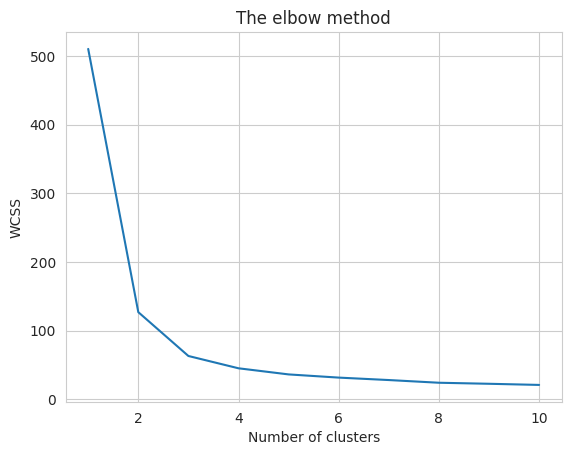

In [15]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [16]:
wcss

[510.0704166666668,
 127.05953109736245,
 63.263064425770324,
 45.3545955882353,
 36.451687979539656,
 31.80623071373072,
 28.24948468198469,
 24.323660506160508,
 22.822091251885368,
 21.156862830152306]

## K = 3: Model evaluation

In [17]:
# Model
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Predict
y_kmeans = kmeans.fit_predict(X_train)

# Labels of predicted
y_labels = kmeans.labels_
print(len(y_labels))

120


In [18]:
kmeans

KMeans(n_clusters=3, n_init=10, random_state=0)

In [19]:
# training predictions
train_labels= kmeans.predict(X_train)
print(len(train_labels))

# testing predictions
test_labels = kmeans.predict(X_test)
print(len(test_labels))

120
30


In [20]:
y_train

84     1
47     0
108    2
1      0
93     1
      ..
50     1
87     1
104    2
129    2
122    2
Name: species, Length: 120, dtype: int64

In [21]:
train_labels

array([1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1,
       2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2,
       0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 2], dtype=int32)

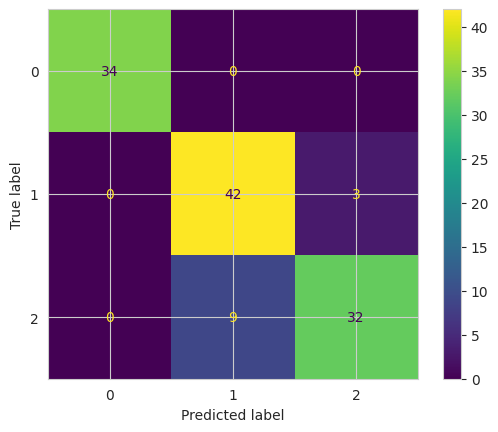

In [22]:
cm = confusion_matrix(y_train, train_labels, labels=[0,1,2])
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1,2])
cm_display.plot()

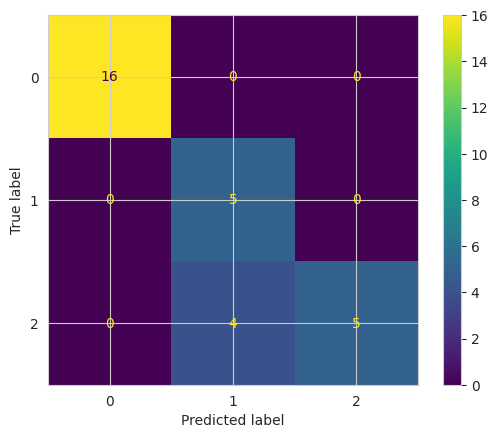

In [23]:
cm = confusion_matrix(y_test, test_labels, labels=[0,1,2])
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1,2])
cm_display.plot()

In [24]:
# KMeans model accuracy

# Train accuracy
print('Train accuracy: ', accuracy_score(y_train, train_labels)*100)

# testing accuracy
print('Test accuracy: ', accuracy_score(y_test, test_labels)*100)

Train accuracy:  90.0
Test accuracy:  86.66666666666667


In [25]:
# training classification_report
print(classification_report(y_train, train_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.82      0.93      0.87        45
           2       0.91      0.78      0.84        41

    accuracy                           0.90       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.90      0.90      0.90       120



In [26]:
# testing classification_report
print(classification_report(test_labels, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.56      0.71         9
           2       0.56      1.00      0.71         5

    accuracy                           0.87        30
   macro avg       0.85      0.85      0.81        30
weighted avg       0.93      0.87      0.87        30



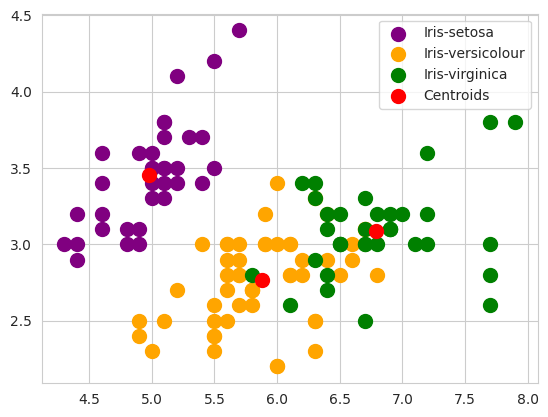

In [27]:
# Visualising the clusters
cols = iris.columns

plt.scatter(X_train.loc[y_kmeans == 0, cols[0]],
            X_train.loc[y_kmeans == 0, cols[1]],
            s=100, c='purple',
            label='Iris-setosa')
plt.scatter(X_train.loc[y_kmeans == 1, cols[0]],
            X_train.loc[y_kmeans == 1, cols[1]],
            s=100, c='orange',
            label='Iris-versicolour')
plt.scatter(X_train.loc[y_kmeans == 2, cols[0]],
            X_train.loc[y_kmeans == 2, cols[1]],
            s=100, c='green',
            label='Iris-virginica')
  
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=100, c='red',
            label='Centroids')
  
plt.legend()

# PCA
------
We used just three features for clustering so this step of visualization with PCA is not actually necessary. However, for the purposes of illustrating PCA's purpose, we will demonstrate how two features can be summarized with one principal component.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
# Standardize the features
x_standard = StandardScaler().fit_transform(X.values)

In [59]:
# Get the first principal component
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_standard)

<Axes: >

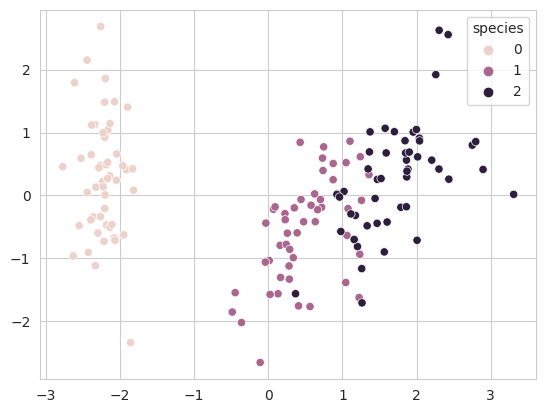

In [60]:
sns.scatterplot(x =principalComponents[:,0], y = principalComponents[:,1], hue = y , legend = "full")

# Clustering with PCA

In [61]:
df_PCA = pd.DataFrame(data = principalComponents)

In [62]:
df_PCA['y'] = y

In [63]:
df_PCA.head()

,0,1,2,y
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
3,-2.299384,-0.597395,0.091290,0
4,-2.389842,0.646835,0.015738,0


In [64]:
df_PCA = pd.DataFrame(df_PCA)

In [65]:
df_PCA.head()

,0,1,2,y
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
3,-2.299384,-0.597395,0.091290,0
4,-2.389842,0.646835,0.015738,0


In [66]:
df_PCA_mod = df_PCA.drop(['y'], axis=1)

## Train and test split with PCA df

In [67]:
# Split the 'features' and 'income' data into training and testing sets
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(df_PCA_mod, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 4)

print('Train X size ', X_train_PCA.shape)
print('Test X size ', X_test_PCA.shape)
print('Train y size ', y_train_PCA.shape)
print('Test y size ', y_test_PCA.shape)

Train X size  (120, 3)
Test X size  (30, 3)
Train y size  (120,)
Test y size  (30,)


## Clustering

In [68]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train_PCA)
    wcss.append(kmeans.inertia_)

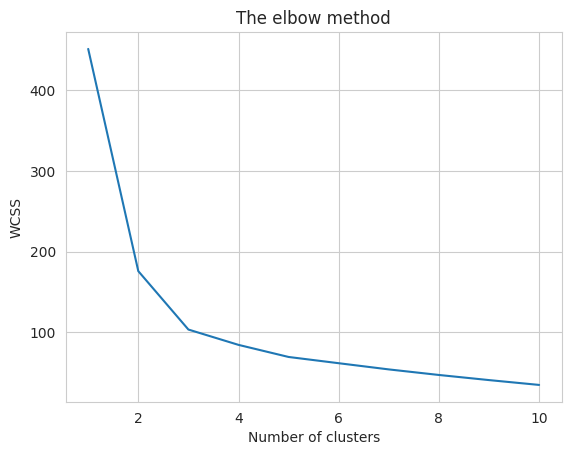

In [69]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

## K = k: Model evaluation

In [70]:
# Model PCA
kmeans_PCA = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Predict
y_kmeans_PCA = kmeans_PCA.fit_predict(X_train_PCA)

# Labels of predicted
y_labels_PCA = kmeans_PCA.labels_

In [71]:
# training predictions
train_labels_PCA = kmeans_PCA.predict(X_train_PCA)

# testing predictions
test_labels_PCA = kmeans_PCA.predict(X_test_PCA)

In [72]:
# KMeans model accuracy

# Train accuracy
print('Train accuracy: ',accuracy_score(y_train_PCA, train_labels_PCA)*100)

# testing accuracy
print('Test accuracy: ',accuracy_score(test_labels_PCA, y_test_PCA)*100)

Train accuracy:  44.166666666666664
Test accuracy:  63.33333333333333


In [73]:
# training classification_report
print(classification_report(y_train_PCA, train_labels_PCA))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.27      0.29      0.28        45
           2       0.16      0.15      0.15        41

    accuracy                           0.44       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.44      0.44      0.44       120



In [74]:
# testing classification_report
print(classification_report(test_labels_PCA, y_test_PCA))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.00      0.00      0.00         5
           2       0.44      0.40      0.42        10

    accuracy                           0.63        30
   macro avg       0.46      0.47      0.46        30
weighted avg       0.62      0.63      0.62        30

